# **install dependencies, register maps, set constants**

**if in collab notebook or running for first time, un-comment the cell below:**

In [1]:
# %pip install numpy
# %pip install pillow
# pip install matplotlib

**import dependencies**

In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot
import os

**number of iterations to run breadth search (i.e. number of cells to propogate outwards)**

In [3]:
iterations = 100

**colourway**

In [4]:
colourway = 'magma'

**point to nolli map**

In [5]:
nolliPATH = r"C:\Users\hyche\Desktop\AR5802 Options 2\Pix2Pix\breadthFirstSearch\testMaps\testNolli3.png"

**point to POI map**

In [6]:
poiPATH = r"C:\Users\hyche\Desktop\AR5802 Options 2\Pix2Pix\breadthFirstSearch\testMaps\testPOI3.png"

**point to output folder**

In [7]:
outputFolder = r"C:\Users\hyche\Desktop\AR5802 Options 2\Pix2Pix\breadthFirstSearch\outputs"

# **define functions**

**function to convert image to bitmap**

In [8]:
def bitmap(path):
    img = Image.open(path)
    img_array = img.convert('1')
    img_array = np.array(img_array)
    return img_array

**check nolli map**

(40, 60)

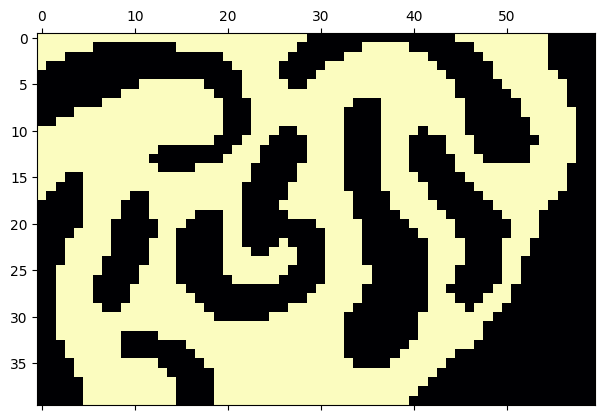

In [9]:
walkable = bitmap(nolliPATH)
matplotlib.pyplot.matshow(walkable, cmap=colourway, vmin = 0, vmax = 1)
np.shape(walkable)

**check poi map**

(40, 60)

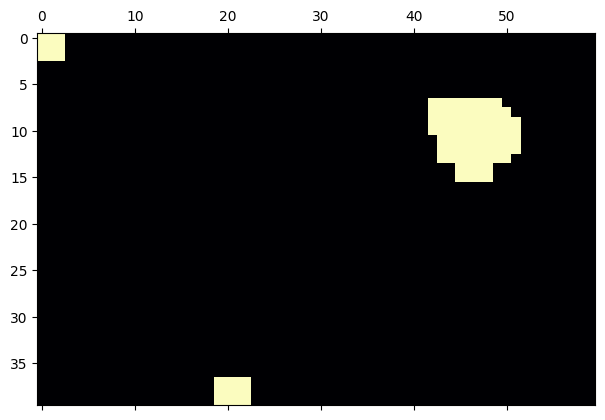

In [10]:
poi = bitmap(poiPATH)
matplotlib.pyplot.matshow(poi, cmap=colourway, vmin = 0, vmax = 1)
np.shape(poi)

**verify images are the same shape**

In [11]:
if np.shape(poi) != np.shape(walkable):
    print("The bitmaps are not the same size. The POI map is", np.shape(poi), "and the walkable map is", np.shape(walkable))
    
else:
    height, width = np.shape(poi)
    print(f"height: {height}, width: {width}")
    

height: 40, width: 60


**initialise frontier cells**

In [12]:
frontier = []

for h in range(height):
    for w in range(width):
        if poi[h][w] == 1:
            frontier.append((h, w))

**initialise mutable cells, distance array**

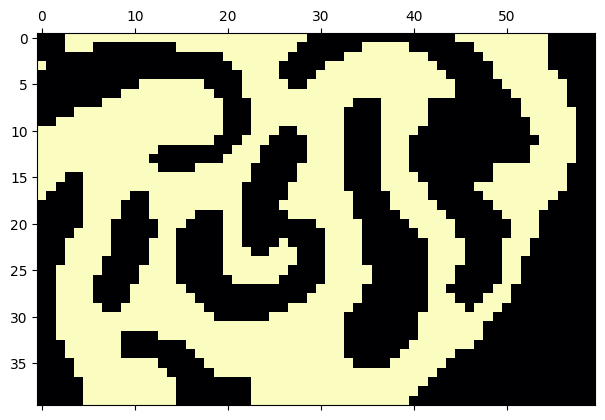

In [13]:
mutable = walkable.copy()
distance = np.full((height, width), iterations)

for h in range(height):
    for w in range(width):
        if poi[h][w] == 1:
            mutable[h][w] = 0
            distance[h][w] = 0

matplotlib.pyplot.matshow(mutable, cmap=colourway)

**propogate**

In [ ]:
i = 0
while i < iterations and len(frontier) != 0:
    if height == 0 or width == 0:
        print("The bitmaps are not the same size. The POI map is", np.shape(poi), "and the walkable map is", np.shape(walkable))
        break
    
    frontierTemp = []
    for f in range(len(frontier)):
        h, w = frontier[f]
        mutable[h][w] = 0

        if h == 0: # if the cell is on the top edge, try propogate except down, update frontierTemp
            if mutable[h+1][w]:
                distance[h+1][w] = i
                mutable[h+1][w] = 0
                frontierTemp.append((h+1, w))
            
            if mutable[h][w+1]:
                distance[h][w+1] = i
                mutable[h][w+1] = 0
                frontierTemp.append((h, w+1))
                
            if mutable[h][w-1]:
                distance[h][w-1] = i
                mutable[h][w-1] = 0
                frontierTemp.append((h, w-1))
                
        if h == height-1: # if the cell is on the bottom edge, try propogate except up, update frontierTemp
            if mutable[h-1][w]:
                distance[h-1][w] = i
                mutable[h-1][w] = 0
                frontierTemp.append((h-1, w))

            if mutable[h][w+1]:
                distance[h][w+1] = i
                mutable[h][w+1] = 0
                frontierTemp.append((h, w+1))
                
            if mutable[h][w-1]:
                distance[h][w-1] = i
                mutable[h][w-1] = 0
                frontierTemp.append((h, w-1))

        if w == 0: # if the cell is on the left edge, try propogate except right, update frontierTemp
            if mutable[h][w+1]:
                distance[h][w+1] = i
                mutable[h][w+1] = 0
                frontierTemp.append((h, w+1))

            if mutable[h+1][w]:
                distance[h+1][w] = i
                mutable[h+1][w] = 0
                frontierTemp.append((h+1, w))
                
            if mutable[h-1][w]:
                distance[h-1][w] = i
                mutable[h-1][w] = 0
                frontierTemp.append((h-1, w))
        
        if w == width-1: # if the cell is on the right edge, try propogate except left, update frontierTemp
            if mutable[h][w-1]:
                distance[h][w-1] = i
                mutable[h][w-1] = 0
                frontierTemp.append((h, w-1))

            if mutable[h+1][w]:
                distance[h+1][w] = i
                mutable[h+1][w] = 0
                frontierTemp.append((h+1, w))
                
            if mutable[h-1][w]:
                distance[h-1][w] = i
                mutable[h-1][w] = 0
                frontierTemp.append((h-1, w))
        
        if h != 0 and h != height-1 and w != 0 and w != width-1: # if not on the edge, try propogate in all directions, update frontierTemp
            if mutable[h+1][w]:
                distance[h+1][w] = i
                mutable[h+1][w] = 0
                frontierTemp.append((h+1, w))
                
            if mutable[h-1][w]:
                distance[h-1][w] = i
                mutable[h-1][w] = 0
                frontierTemp.append((h-1, w))
                
            if mutable[h][w+1]:
                distance[h][w+1] = i
                mutable[h][w+1] = 0
                frontierTemp.append((h, w+1))
                
            if mutable[h][w-1]:
                distance[h][w-1] = i
                mutable[h][w-1] = 0
                frontierTemp.append((h, w-1))

    frontier = frontierTemp
    i = i+1
    print(f"iteration {i}, number of frontiers: {len(frontier)}")

iteration 1, number of frontiers: 21
iteration 2, number of frontiers: 21
iteration 3, number of frontiers: 24
iteration 4, number of frontiers: 25
iteration 5, number of frontiers: 29
iteration 6, number of frontiers: 31
iteration 7, number of frontiers: 29
iteration 8, number of frontiers: 30
iteration 9, number of frontiers: 32
iteration 10, number of frontiers: 33
iteration 11, number of frontiers: 35
iteration 12, number of frontiers: 35
iteration 13, number of frontiers: 36
iteration 14, number of frontiers: 34
iteration 15, number of frontiers: 32
iteration 16, number of frontiers: 31
iteration 17, number of frontiers: 32
iteration 18, number of frontiers: 35
iteration 19, number of frontiers: 37
iteration 20, number of frontiers: 37
iteration 21, number of frontiers: 40
iteration 22, number of frontiers: 42
iteration 23, number of frontiers: 48
iteration 24, number of frontiers: 44
iteration 25, number of frontiers: 46
iteration 26, number of frontiers: 41
iteration 27, number 

In [15]:
for h in range(height):
    for w in range(width):
        if distance[h][w] == iterations:
            distance[h][w] = 0
        else:
            distance[h][w] = i - distance[h][w]

array([[47, 47, 47, ...,  0,  0,  0],
       [47, 47, 47, ...,  0,  0,  0],
       [47, 47, 47, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], shape=(40, 60))

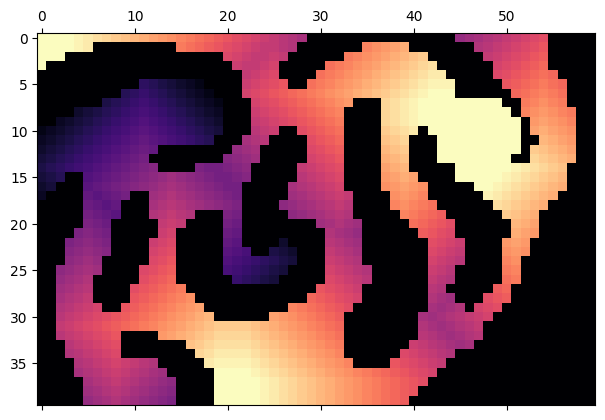

In [16]:
matplotlib.pyplot.matshow(distance, cmap=colourway)
distance